           ID            ExposureL            ExposureR  \
count     276                   65                  225   
unique    240                   23                   27   
top     NW280  2020-01-12 00:00:00  2020-01-22 00:00:00   
freq        2                    8                   31   
first     NaN  2019-12-17 00:00:00  2020-01-02 00:00:00   
last      NaN  2020-01-22 00:00:00  2020-01-30 00:00:00   

                        ExposureType                Onset  \
count                            276                  226   
unique                            10                   27   
top     Lives-works-studies in Wuhan  2020-01-24 00:00:00   
freq                             132                   23   
first                            NaN  2019-12-29 00:00:00   
last                             NaN  2020-01-30 00:00:00   

       DateCaseFirstSoughtHealthcare DateHospitalizedIsolated  \
count                            117                      168   
unique                      

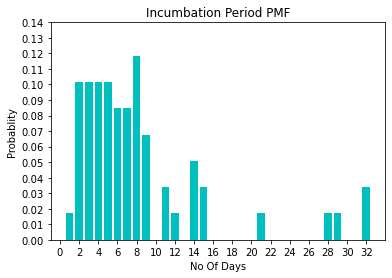

Incumbation Period PMF for people not from Wuhan
Mean of the incumbation period is 8.305084745762711
Variance of the incumbation period is 51.56049094097018

{2: 2, 3: 2, 4: 1, 5: 2, 6: 1, 11: 1, 15: 2, 28: 1}


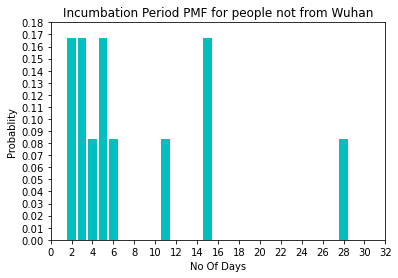

Mean of the incumbation period is 8.25
Variance of the incumbation period is 60.56818181818182

By comparing, we get that the expected value of incumbation period for both in Wuhan and 
      outside Wuhan Cases are same. Also the variance is quite similar.
This is justified because Incumabation period is depenedent on the virus and how it 
interacts with the body and not with the carrier of the virus.
Also we should not take any valid conclusion from this since the data for 
people not living in Wuhan is very small to make a general conclusion from this.


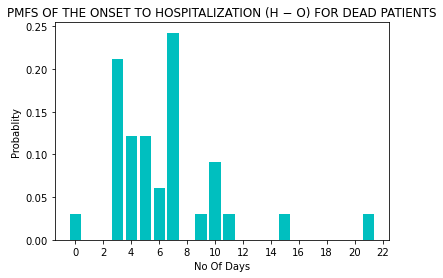

PMFS OF THE ONSET TO HOSPITALIZATION (H − O) FOR DEAD PATIENTS
Expected Value(Mean):  6.393939393939394
Variance :  15.93371212121212



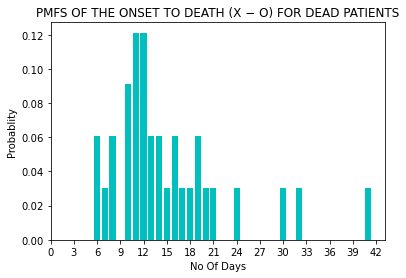

PMFS OF THE ONSET TO DEATH (X − O) FOR DEAD PATIENTS
Expected Value(Mean):  15.121212121212121
Variance :  58.984848484848484



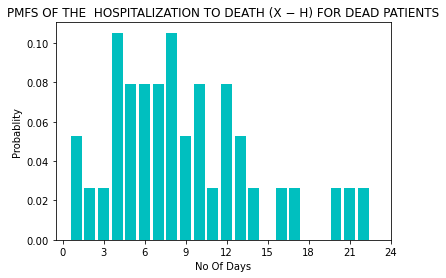

PMFS OF THE  HOSPITALIZATION TO DEATH (X − H) FOR DEAD PATIENTS
Expected Value(Mean):  8.947368421052632
Variance :  28.15931721194879

In the plots above, the only similarity,I can percieve is that of them all being bell curved.Also the sum of H-O and X-H is equal to X-O time which has to be true.


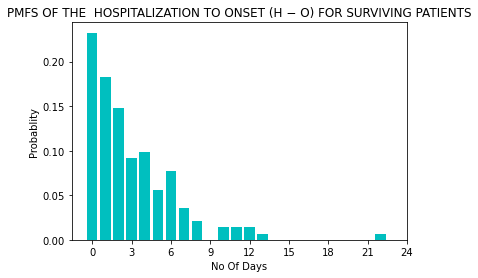

PMFS OF THE  HOSPITALIZATION TO ONSET (H − O) FOR SURVIVING PATIENTS
Expected Value(Mean): 3.0211267605633805
Variance : 11.141394466087304

By comparing the Hospitalization to Onset (H-O) PMF for survived and deceased people, we can conclude that people who survived were hospitalized early with an expected value of around 3 days while those who didn't have an expected value of 6 days. By this ,we can conclude that we should get ourselves hospitalized as early as possible if we have onset of symptoms.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics


df=pd.read_excel("linton_supp_tableS1_S2_8Feb2020.xlsx",skiprows=1)
_df=pd.read_excel("linton_supp_tableS1_S2_8Feb2020.xlsx",1,skiprows=1,names=['ID', 'Onset', 'FirstSoughtHealthcare', 'Hospi','Death', 'DeathTime', 'Source'])


# In[2]:


print(df.describe())


# In[3]:


print(df.head())


# In[4]:


#2.a

reqdf=df[(df.ExposureL.notnull()) & (df.Onset.notnull())]
print(reqdf.head())


# In[5]:


L=list(reqdf.ExposureL)
O=list(reqdf.Onset)
I=[] #Incumbation


# In[6]:


for i in range(len(O)):
    I.append((O[i]-L[i]).days)
IDays={}
I.sort()
for i in I:
    IDays[i]=IDays.get(i,0)+1
print(IDays)


# In[7]:


Days=np.asarray(list(IDays.keys()))
Freq=np.asarray(list(IDays.values()))
Prob=Freq/sum(Freq)
ax=plt.axes()
plt.title("Incumbation Period PMF")
ax.set_xlabel("No Of Days")
ax.set_ylabel("Probablity")
plt.bar(Days,Prob,color="c")
plt.xticks(np.arange(0,34,2))
plt.yticks(np.arange(0,0.14,0.01))
plt.show()


# In[8]:

print("Incumbation Period PMF for people not from Wuhan")
print("Mean of the incumbation period is {}".format(statistics.mean(I)))
print("Variance of the incumbation period is {}".format(statistics.variance(I)))


# In[9]:


print()


# In[10]:


#2.b
reqdf=df[(df.ExposureL.notnull()) & (df.Onset.notnull()) & (~df.ExposureType.isin(["Travel to Wuhan","Contact with Wuhan resident","Lives-works-studies in Wuhan",""]))]


# In[11]:


L=list(reqdf.ExposureL)
O=list(reqdf.Onset)
I=[] #Incumbation
for i in range(len(O)):
    I.append((O[i]-L[i]).days)
IDays={}
I.sort()
for i in I:
    IDays[i]=IDays.get(i,0)+1
print(IDays)
Days=np.asarray(list(IDays.keys()))
Freq=np.asarray(list(IDays.values()))
Prob=Freq/sum(Freq)
ax=plt.axes()
plt.title("Incumbation Period PMF for people not from Wuhan")
ax.set_xlabel("No Of Days")
ax.set_ylabel("Probablity")
plt.bar(Days,Prob,color="c")
plt.xticks(np.arange(0,34,2))
plt.yticks(np.arange(0,0.19,0.01))
plt.show()
print("Mean of the incumbation period is {}".format(statistics.mean(I)))
print("Variance of the incumbation period is {}".format(statistics.variance(I)))
print()


# In[12]:


print("""By comparing, we get that the expected value of incumbation period for both in Wuhan and 
      outside Wuhan Cases are same. Also the variance is quite similar.
This is justified because Incumabation period is depenedent on the virus and how it 
interacts with the body and not with the carrier of the virus.
Also we should not take any valid conclusion from this since the data for 
people not living in Wuhan is very small to make a general conclusion from this.""")


# In[13]:


#pmfs of the onset to hospitalization (H − O) for dead patients
reqdf=_df[_df.Onset.notnull() & (_df.Hospi.notnull())]
H=list(reqdf.Hospi)
O=list(reqdf.Onset)
D=[]
for i in range(len(H)):
    D.append((H[i]-O[i]).days)
D.sort()
dc={}
for i in D:
    dc[i]=dc.get(i,0)+1
    
ax=plt.axes()
plt.title("pmfs of the onset to hospitalization (H − O) for dead patients".upper())
ax.set_xlabel("No Of Days")
ax.set_ylabel("Probablity")
plt.bar(list(dc.keys()),np.asarray(list(dc.values()))/sum(list(dc.values())),color="c")
plt.xticks(np.arange(0,23,2))
plt.show()
print("pmfs of the onset to hospitalization (H − O) for dead patients".upper())
print("Expected Value(Mean): ",statistics.mean(D))
print("Variance : ",statistics.variance(D))

print()
# In[14]:


#pmfs of the onset to death (X − O) for dead patients
reqdf=_df[_df.Onset.notnull() & (_df.Death.notnull())]
O=list(reqdf.Onset)
X=list(reqdf.Death)
D=[]
for i in range(len(H)):
    D.append((X[i]-O[i]).days)
D.sort()
dc={}
for i in D:
    dc[i]=dc.get(i,0)+1
    
ax=plt.axes()
plt.title("pmfs of the onset to death (X − O) for dead patients".upper())
ax.set_xlabel("No Of Days")
ax.set_ylabel("Probablity")
plt.bar(list(dc.keys()),np.asarray(list(dc.values()))/sum(list(dc.values())),color="c")
plt.xticks(np.arange(0,45,3))
plt.show()
print("pmfs of the onset to death (X − O) for dead patients".upper())
print("Expected Value(Mean): ",statistics.mean(D))
print("Variance : ",statistics.variance(D))

print()

# In[15]:


#pmfs of the  hospitalization to death (X − H) for dead patients
reqdf=_df[_df.Hospi.notnull() & (_df.Death.notnull())]
H=list(reqdf.Hospi)
X=list(reqdf.Death)
D=[]
for i in range(len(H)):
    D.append((X[i]-H[i]).days)
D.sort()
dc={}
for i in D:
    dc[i]=dc.get(i,0)+1
    
ax=plt.axes()
plt.title("pmfs of the  hospitalization to death (X − H) for dead patients".upper())
ax.set_xlabel("No Of Days")
ax.set_ylabel("Probablity")
plt.bar(list(dc.keys()),np.asarray(list(dc.values()))/sum(list(dc.values())),color="c")
plt.xticks(np.arange(0,25,3))
plt.show()

print("pmfs of the  hospitalization to death (X − H) for dead patients".upper())
print("Expected Value(Mean): ",statistics.mean(D))
print("Variance : ",statistics.variance(D))

print()

# In[16]:


print("""In the plots above, the only similarity,I can percieve is that of them all being bell curved.Also the sum of H-O and X-H is equal to X-O time which has to be true.""")


# In[17]:


#H − O pmf for surviving and patients
reqdf=df[df.DateHospitalizedIsolated.notnull() & (df.Onset.notnull())]
H=list(reqdf.DateHospitalizedIsolated)
O=list(reqdf.Onset)
D=[]
for i in range(len(H)):
    D.append((H[i]-O[i]).days)
D.sort()
dc={}
for i in D:
    dc[i]=dc.get(i,0)+1
    
ax=plt.axes()
plt.title("pmfs of the  hospitalization to Onset (H − O) for surviving patients".upper())
ax.set_xlabel("No Of Days")
ax.set_ylabel("Probablity")
plt.bar(list(dc.keys()),np.asarray(list(dc.values()))/sum(list(dc.values())),color="c")
plt.xticks(np.arange(0,25,3))
plt.show()
print("pmfs of the  hospitalization to Onset (H − O) for surviving patients".upper())
print("Expected Value(Mean):",statistics.mean(D))
print("Variance :",statistics.variance(D))

print()

# In[18]:


print("""By comparing the Hospitalization to Onset (H-O) PMF for survived and deceased people, we can conclude that people who survived were hospitalized early with an expected value of around 3 days while those who didn't have an expected value of 6 days. By this ,we can conclude that we should get ourselves hospitalized as early as possible if we have onset of symptoms.""")


# In[ ]:




